# Classification of Dyslexic and Normal Children using EEG and Decision Tree Machine Learning Algorithm

# About Dataset:

EEG signals were collected from 30 healthy children without dyslexia and 30 dyslexic children with age group betwen 6-12 years.
During the data collection process, the EEG signal was recorded while children wrote Tamil letters.
The recorded signals were downloaded as a CSV file using the Mindmonitor mobile application.

# *Data Preprocssing*

1. Eye blinks were removed
2. Checking for NaN values
3. Target variable is assigned(1-Dyslexic, 0-Normal)
4. All the CSV files ar merged and final original.csv file is obtained

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dyslexic_file=r"C:\Users\hello\OneDrive\Desktop\dyslexic.csv"
df1=pd.read_csv(dyslexic_file, encoding='ISO-8859-1')
df1.head()

,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,...,PPG_IR,PPG_Red,Heart_Rate,HeadBandOn,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,Battery,Elements
0,2023-03-06 12:03:39.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/event/connected Muse-C3A8
1,2023-03-06 12:03:39.018,1.367967,1.188432,0.0,1.392921,1.298515,1.36207,0.0,1.776466,1.164842,...,7.924996e+07,1.586982e+07,118.14830,1.0,2.0,1.0,2.0,2.0,100.0,NaN
2,2023-03-06 12:03:39.529,1.367967,1.188432,0.0,1.392921,1.298515,1.36207,0.0,1.776466,1.164842,...,7.895018e+07,1.596330e+07,114.49454,1.0,2.0,1.0,2.0,2.0,100.0,NaN
3,2023-03-06 12:03:39.813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/blink
4,2023-03-06 12:03:40.037,1.367967,1.188432,0.0,1.392921,1.298515,1.36207,0.0,1.776466,1.164842,...,7.866491e+07,1.708264e+07,112.94174,1.0,2.0,1.0,2.0,2.0,100.0,NaN


In [5]:
normal_file=r"C:\Users\hello\OneDrive\Desktop\normal.csv"
df2=pd.read_csv(normal_file, encoding='ISO-8859-1')
df2.head()

,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,...,PPG_IR,PPG_Red,Heart_Rate,HeadBandOn,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,Battery,Elements
0,2023-03-16 12:02:47.481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/event/connected Muse-C3A8
1,2023-03-16 12:02:47.535,1.010820,0.636376,0.709528,1.067153,0.987127,0.386562,0.385157,0.790213,1.530005,...,8.091971e+07,1.605839e+07,97.13328,1.0,1.0,1.0,1.0,1.0,60.0,NaN
2,2023-03-16 12:02:48.050,0.715361,0.323836,0.923139,0.907268,1.072248,0.159480,0.459094,1.024441,1.481725,...,8.108813e+07,1.600198e+07,97.13328,1.0,1.0,1.0,1.0,1.0,55.0,NaN
3,2023-03-16 12:02:48.586,0.854849,0.271773,1.012034,0.984089,1.152627,0.391210,0.458812,1.036762,1.481725,...,8.101963e+07,1.599875e+07,97.13328,1.0,1.0,1.0,1.0,1.0,55.0,NaN
4,2023-03-16 12:02:48.953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/blink


In [7]:
def corr_heatmap(instance_path):
    df=pd.read_csv(instance_path, encoding='ISO-8859-1')
    df=df.iloc[:, :21]
    d=df.corr()
    fig, ax=plt.subplots(figsize=(10,7))
    sns.heatmap(d, cmap="YlGnBu", annot=True, fmt='.1f', ax=ax)

Dyslexic Child Heat Map


C:\Users\hello\AppData\Local\Temp\ipykernel_20220\3599326362.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  d=df.corr()


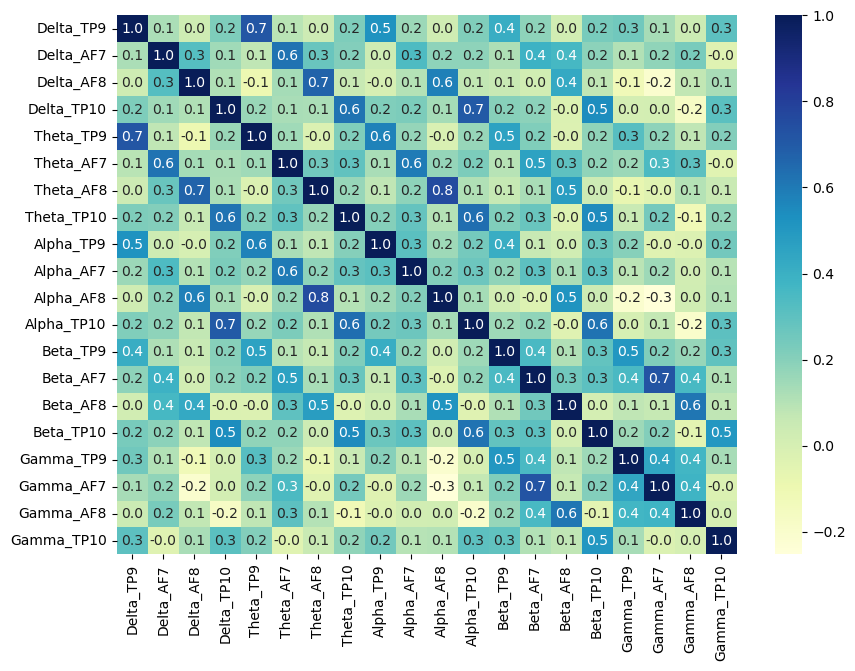

In [8]:
print("Dyslexic Child Heat Map")
corr_heatmap(dyslexic_file)



Normal Child Heat Map


C:\Users\hello\AppData\Local\Temp\ipykernel_20220\3599326362.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  d=df.corr()


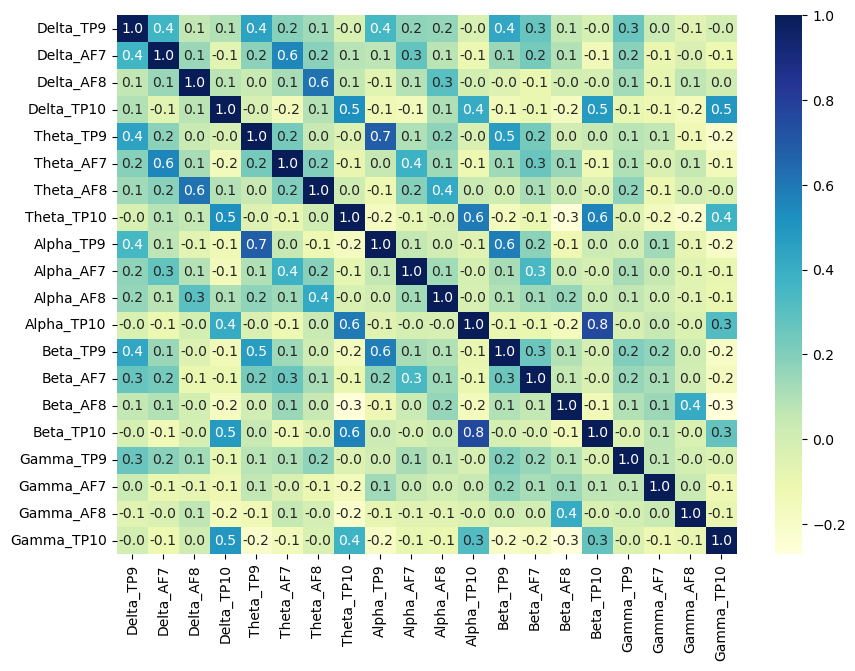

In [9]:
print("Normal Child Heat Map")
corr_heatmap(normal_file)

In [11]:
import pandas as pd
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report

In [13]:
original_file=r"C:\Users\hello\OneDrive\Desktop\original.csv"
df3=pd.read_csv(original_file, encoding='ISO-8859-1')
df3.head()

,Unnamed: 0,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,...,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF7,Gamma_AF8,Gamma_TP10,dys,nor
0,0,03:44.1,1.367967,1.188432,0.467795,1.392921,1.298515,1.36207,0.392392,1.776466,...,0.840405,0.812179,1.303228,1.255975,0.535478,0.917994,0.756525,0.342541,1,nor
1,1,03:44.6,1.367967,1.188432,0.467795,1.392921,1.298515,1.36207,0.392392,1.776466,...,0.840405,0.812179,1.303228,1.255975,0.535478,0.917994,0.756525,0.342541,1,nor
2,2,03:45.1,1.367967,1.188432,0.467795,1.392921,1.298515,1.36207,0.392392,1.776466,...,0.840405,0.812179,1.303228,1.255975,0.535478,0.917994,0.756525,0.342541,1,nor
3,3,03:45.6,1.367967,1.188432,0.467795,1.392921,1.298515,1.36207,0.392392,1.776466,...,0.840405,0.812179,1.303228,1.255975,0.535478,0.917994,0.756525,0.342541,1,nor
4,4,03:46.1,1.367967,1.188432,0.467795,1.392921,1.298515,1.36207,0.392392,1.776466,...,0.840405,0.812179,1.303228,1.255975,0.535478,0.917994,0.756525,0.342541,1,nor


In [15]:
df=df3.iloc[:,2:22] #selecting rows and columns required
df.info() #for attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41480 entries, 0 to 41479
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Delta_TP9   41480 non-null  float64
 1   Delta_AF7   41480 non-null  float64
 2   Delta_AF8   41480 non-null  float64
 3   Delta_TP10  41480 non-null  float64
 4   Theta_TP9   41480 non-null  float64
 5   Theta_AF7   41480 non-null  float64
 6   Theta_AF8   41480 non-null  float64
 7   Theta_TP10  41480 non-null  float64
 8   Alpha_TP9   41480 non-null  float64
 9   Alpha_AF7   41480 non-null  float64
 10  Alpha_AF8   41480 non-null  float64
 11  Alpha_TP10  41480 non-null  float64
 12  Beta_TP9    41480 non-null  float64
 13  Beta_AF7    41480 non-null  float64
 14  Beta_AF8    41480 non-null  float64
 15  Beta_TP10   41480 non-null  float64
 16  Gamma_TP9   41480 non-null  float64
 17  Gamma_AF7   41480 non-null  float64
 18  Gamma_AF8   41480 non-null  float64
 19  Gamma_TP10  41480 non-nul

In [16]:
df3.head(5)

,Unnamed: 0,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,...,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF7,Gamma_AF8,Gamma_TP10,dys,nor
0,0,03:44.1,1.367967,1.188432,0.467795,1.392921,1.298515,1.36207,0.392392,1.776466,...,0.840405,0.812179,1.303228,1.255975,0.535478,0.917994,0.756525,0.342541,1,nor
1,1,03:44.6,1.367967,1.188432,0.467795,1.392921,1.298515,1.36207,0.392392,1.776466,...,0.840405,0.812179,1.303228,1.255975,0.535478,0.917994,0.756525,0.342541,1,nor
2,2,03:45.1,1.367967,1.188432,0.467795,1.392921,1.298515,1.36207,0.392392,1.776466,...,0.840405,0.812179,1.303228,1.255975,0.535478,0.917994,0.756525,0.342541,1,nor
3,3,03:45.6,1.367967,1.188432,0.467795,1.392921,1.298515,1.36207,0.392392,1.776466,...,0.840405,0.812179,1.303228,1.255975,0.535478,0.917994,0.756525,0.342541,1,nor
4,4,03:46.1,1.367967,1.188432,0.467795,1.392921,1.298515,1.36207,0.392392,1.776466,...,0.840405,0.812179,1.303228,1.255975,0.535478,0.917994,0.756525,0.342541,1,nor


In [17]:
#Feature Dataframe
X=df.iloc[:,2:22]

#Target Column
Y=df3['dys']

In [19]:
#Splitting dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [20]:
#Creating Decision Tree Model
clf=DecisionTreeClassifier()
clf=clf.fit(X_train, Y_train)
print(clf)

DecisionTreeClassifier()


In [23]:
Y_pred = clf.predict(X_test)

#Evaluating the perfromance of the classifier
accuracy=accuracy_score(Y_test, Y_pred)

print(accuracy)

print("\n")

print(classification_report(Y_test, Y_pred))

0.795443587270974


              precision    recall  f1-score   support

           0       0.77      0.77      0.77      3703
           1       0.81      0.82      0.82      4593

    accuracy                           0.80      8296
   macro avg       0.79      0.79      0.79      8296
weighted avg       0.80      0.80      0.80      8296

